# Introduction to Quantum Circuits

## Imports

In [1]:
# Quantum Libraries
from qiskit import Aer, QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.circuit import Parameter
from qiskit.utils import algorithm_globals

# Matrix Libraries
import numpy as np

# Local Modules
from lib import plot_circuit, run_circuit, random_angle

## Constants and Setup

In [2]:
SEED = 42
simulator = Aer.get_backend("aer_simulator")

# Seed setup for reproducibility
simulator.set_options(seed_simulator=SEED)
algorithm_globals.random_seed = SEED
np.random.seed(SEED)

## Simple Circuit

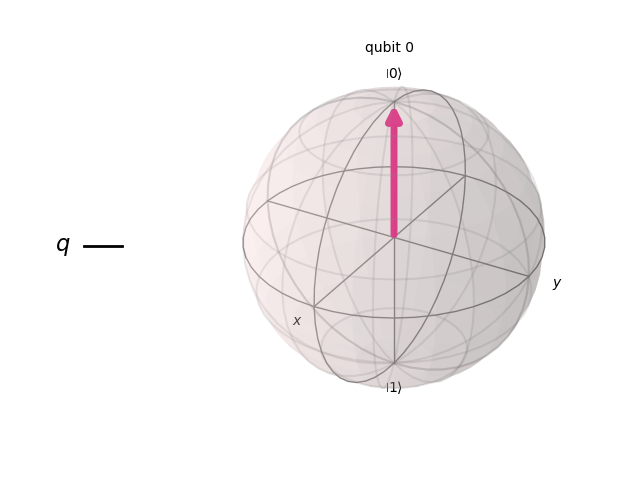

<IPython.core.display.Latex object>

In [3]:
circuit = QuantumCircuit(1)

plot_circuit(circuit)

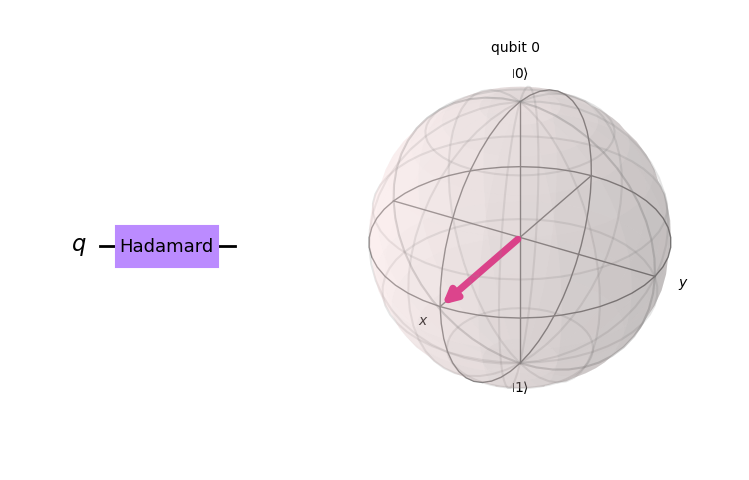

<IPython.core.display.Latex object>

In [4]:
h_op = Operator(np.array([[1, 1], [1, -1]]) / np.sqrt(2))

circuit.unitary(
    h_op, 0, label="Hadamard"
)  # Rotates state vector by π / 2 along the x-axis

plot_circuit(circuit)

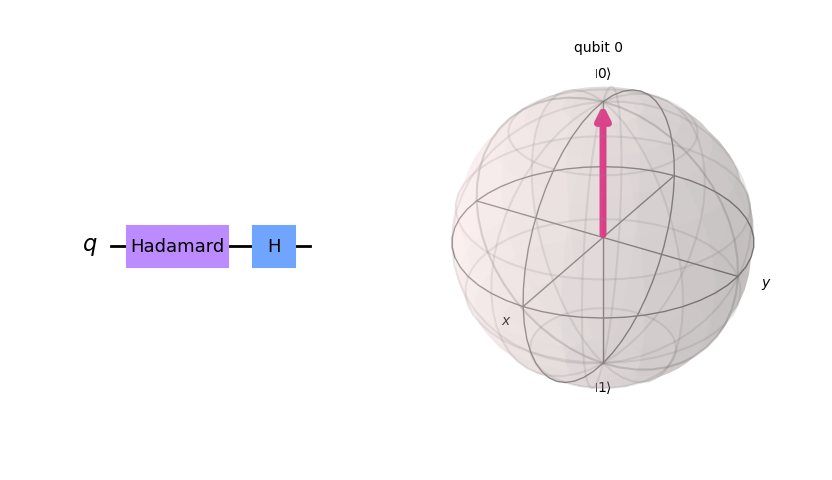

<IPython.core.display.Latex object>

In [5]:
# Quantum "gates" need to be reversible
circuit.h(0)

plot_circuit(circuit)

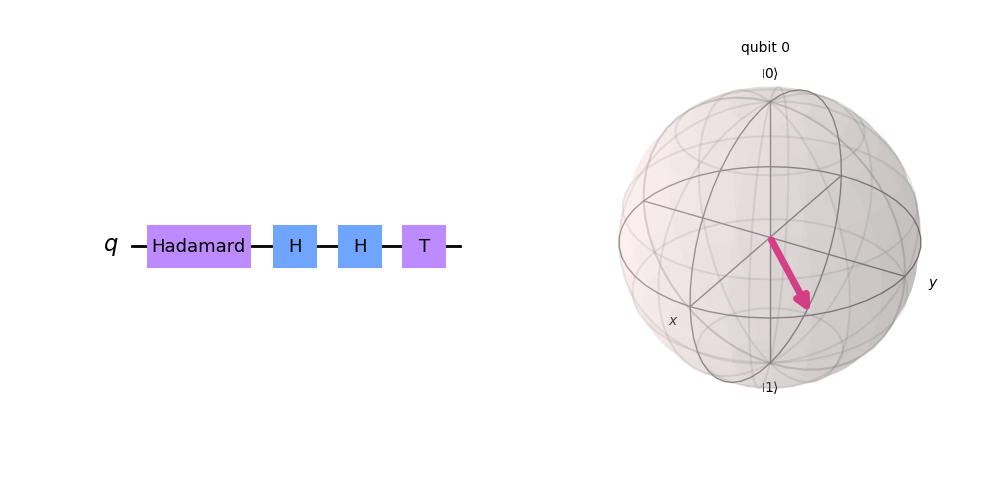

<IPython.core.display.Latex object>

In [6]:
circuit.h(0)
circuit.t(0)
circuit.measure_all

plot_circuit(circuit)

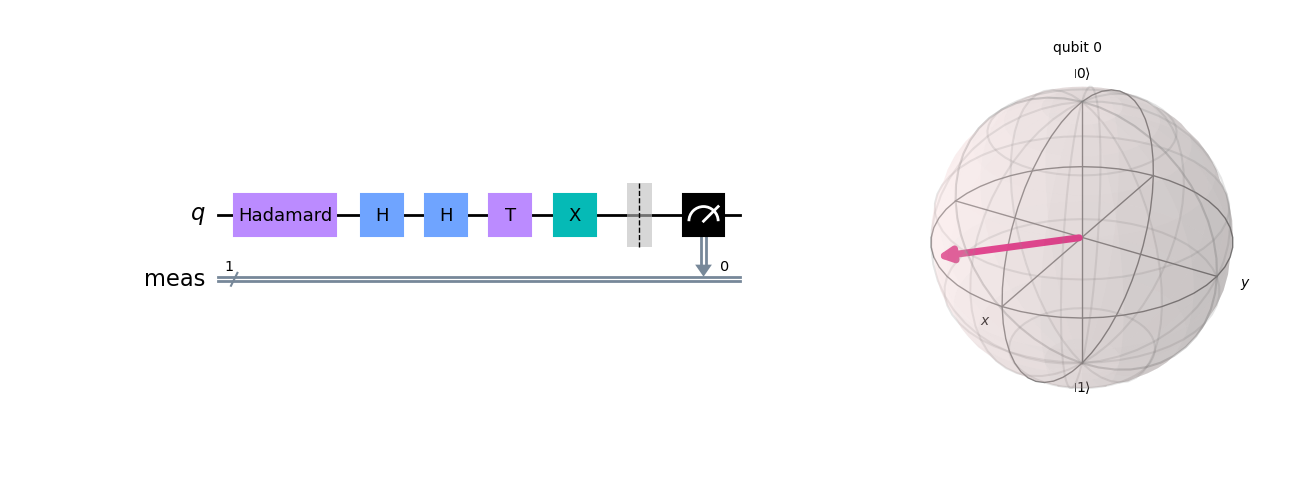

<IPython.core.display.Latex object>

In [7]:
circuit.x(0)
circuit.measure_all()

plot_circuit(circuit)

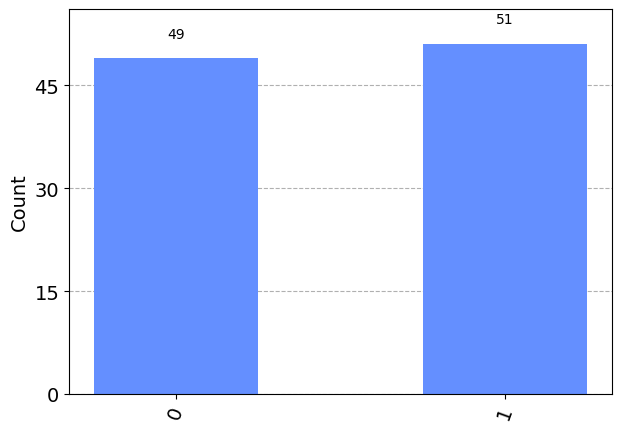

In [8]:
run_circuit(circuit, simulator, shots=100)

## Parameterized Circuits

In [9]:
# Constants
num_qubits = 3

phi = Parameter("φ")
theta = Parameter("θ")
psi = Parameter("ψ")

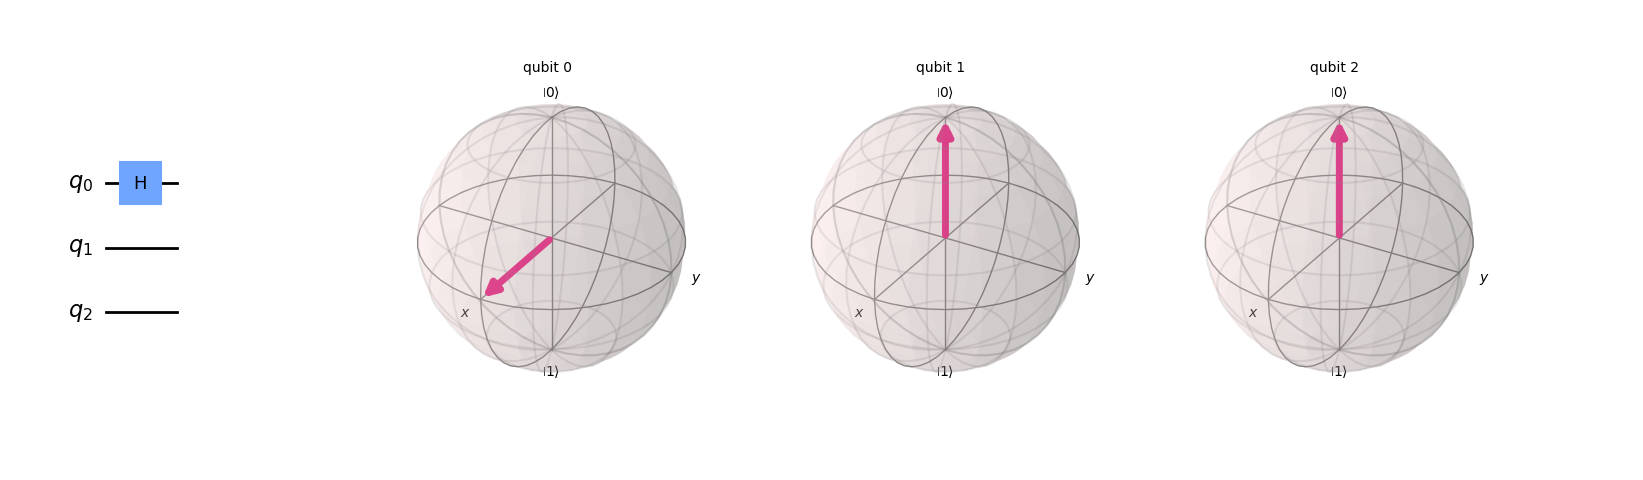

<IPython.core.display.Latex object>

In [10]:
parameterized_circuit = QuantumCircuit(num_qubits)

parameterized_circuit.h(0)

plot_circuit(parameterized_circuit)

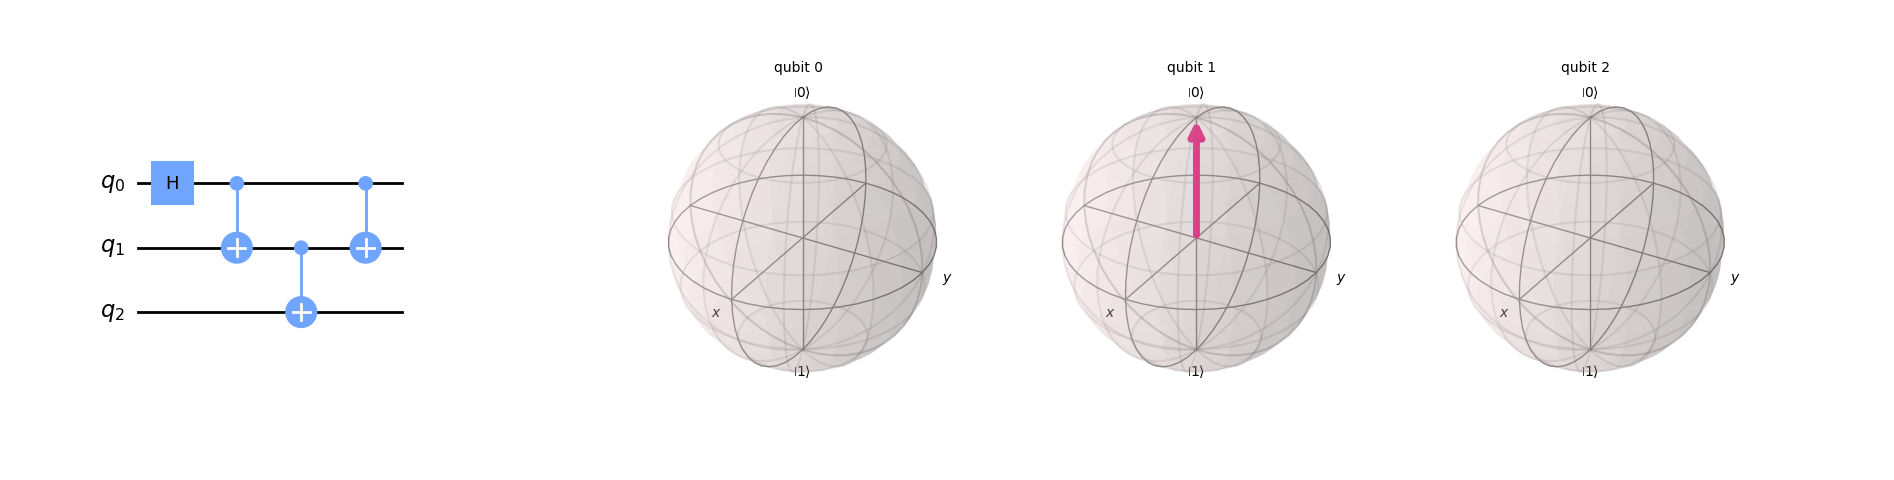

<IPython.core.display.Latex object>

In [11]:
parameterized_circuit.cx(0, 1)
parameterized_circuit.cx(1, 2)
parameterized_circuit.cx(0, 1)

plot_circuit(parameterized_circuit)

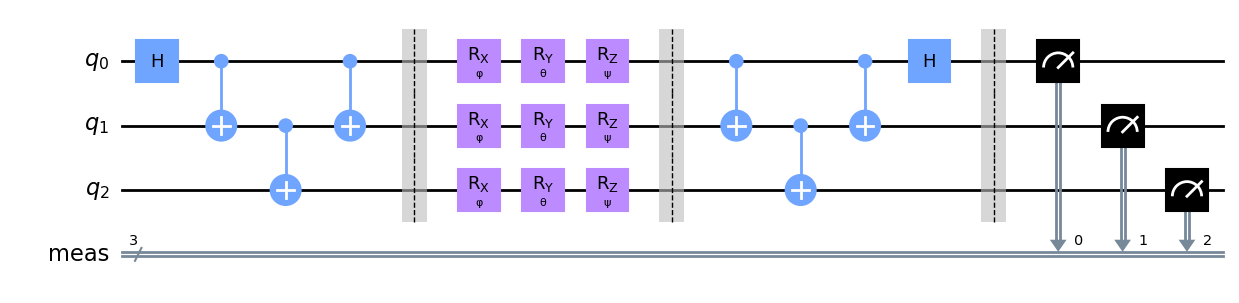

In [12]:
parameterized_circuit.barrier()

parameterized_circuit.rx(phi, range(num_qubits))
parameterized_circuit.ry(theta, range(num_qubits))
parameterized_circuit.rz(psi, range(num_qubits))

parameterized_circuit.barrier()

parameterized_circuit.cx(0, 1)
parameterized_circuit.cx(1, 2)
parameterized_circuit.cx(0, 1)

parameterized_circuit.h(0)
parameterized_circuit.measure_all()

parameterized_circuit.draw("mpl")

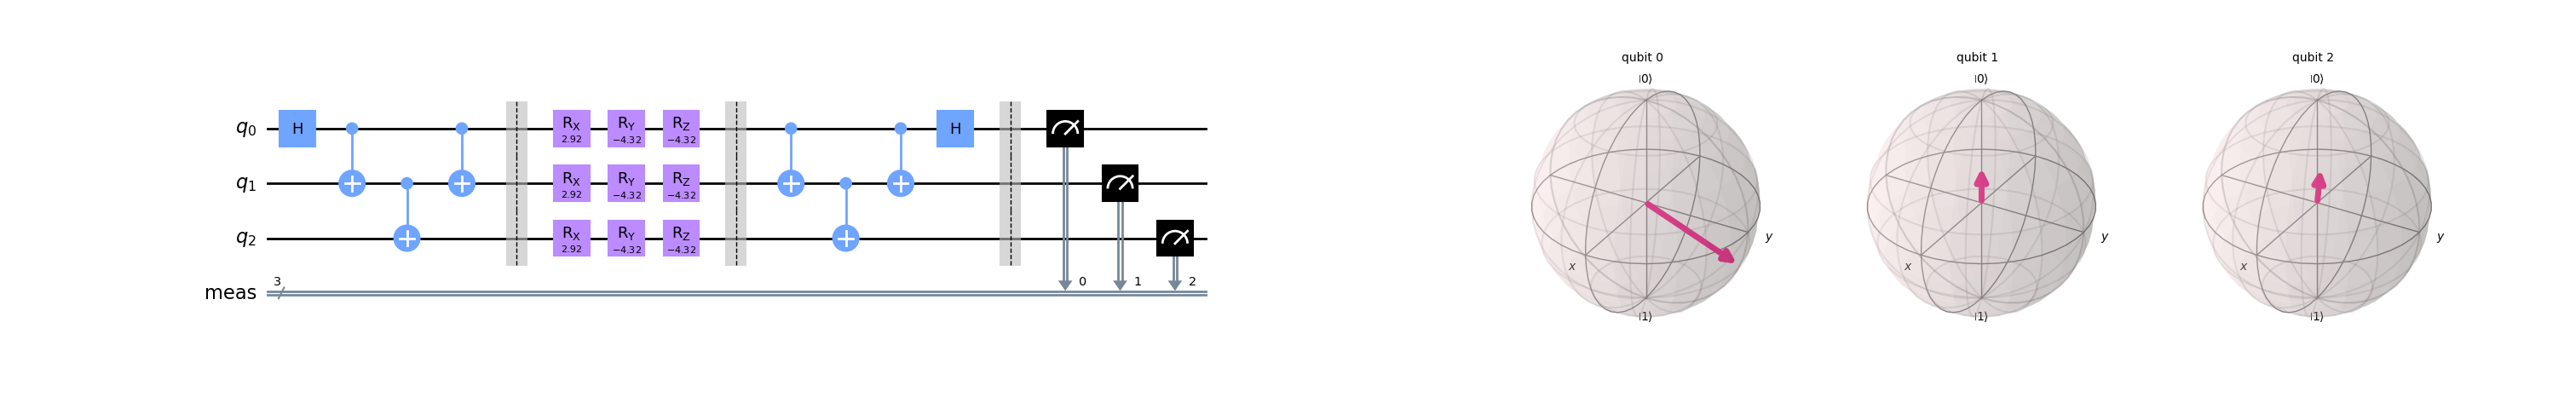

<IPython.core.display.Latex object>

In [13]:
parameterized_circuit.assign_parameters(
    {phi: random_angle() for _ in parameterized_circuit.parameters}, inplace=True
)
parameterized_circuit.assign_parameters(
    {theta: random_angle() for _ in parameterized_circuit.parameters}, inplace=True
)
parameterized_circuit.assign_parameters(
    {psi: random_angle() for _ in parameterized_circuit.parameters}, inplace=True
)

plot_circuit(parameterized_circuit)

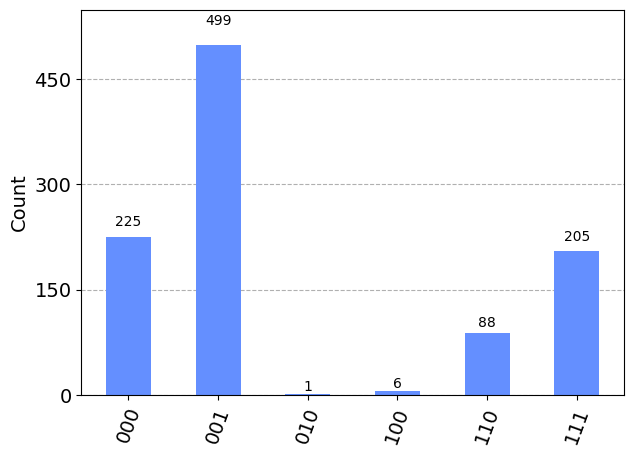

In [14]:
run_circuit(parameterized_circuit, simulator)